# Práctica 1 - Análisis numérico

## Autores:
<ul>
<li> López Espíndola Luis Enrique
<li> Mucio Alvarez Santos
<li> Muñiz Lescale Marco Aurelio
<li> Reynoso Sánchez Arturo Yitzack
</ul>

## <FONT COLOR="blue">Ejercicio 1</FONT>
El valor de $\pi$ puede ser estimado a partir de la expresión

$$\frac{2}{\pi}=\frac{\sqrt{2}}{2}\cdot \frac{\sqrt{2+\sqrt{2}}}{2}\cdot \frac{\sqrt{2+\sqrt{2+\sqrt{2}}}}{2}$$

Escriba un script que determine $\pi$ para cualquier número de términos. Para hacer esto, se debe preguntar al usuario el número de términos, después calcular el correspondiente valor de
la aproximación de $\pi$ y mostrarla al usuario.

In [ ]:
import numpy as np
# Función que calcula de forma recursiva la expresión de la raíz cuadrada 
# de 2 mas la raíz cuadrada de 2 y así sucesivamente.
def raiz(n:int)->float:
  '''
  Esta función realiza el cálculo de una raíz cuadrada de 2 más la raíz 
  cuadrada de 2 más la raíz cuadrada de dos ... sucesivamente de forma recursiva
  inputs:
    n: cantidad de valores para  la raíz
  outputs:
    sqrt(2+sqrt(2+sqrt(2+...)))
  '''
  if(n==1):
    return np.sqrt(2)
  else:
    return np.sqrt(2+raiz(n-1))

# Función que aproxima pi y utiliza la funcion anterior
def aproximacion_pi(n:int)->float:
  '''
  Esta función realiza el cálculo de la aporximación de pi dependiendo de la 
  cantidad de término que tenga la raíz de 2  más la raíz de 2 sucesivamente.
  Se utiliza la función deifnida como raiz(n)
    n: cantidad de valores para  la aproximación
  outputs:
    aproximación de pi
  >>>aproximacion_pi(55)
  3.141592653589794
  '''
  # Si n=1 significa que sólo se busca un factor
  if(n==1):
    return (2**(n+1))/raiz(n)
  # Para dos o más factores
  else:
    pi = 2**(n+1) 
    a = 1
    # se utiliza para hallar el producto de la cantidad de factores
    for i in range(n):
      a = a*raiz(i+1)
    # devuelve la aproximación de pi con n factores
    return pi*(1/a)
# Al correr el programa se le pide al usuario que ingrese un valor numérico entero
try:
    n = int(input("Dame un numero entero para el número de factores para la aproximacion: "))
    print("El valor de pi para ", n," factores es: ",aproximacion_pi(n))
except ValueError:
    print("Error en los argumentos de entrada, estos deben ser numéricos enteros")



Dame un numero entero para el número de factores para la aproximacion: 55
El valor de pi para  55  factores es:  3.141592653589794


## <FONT COLOR="blue">Ejercicio 2</FONT>
Un número primo de Mersenne es un número primo que es igual a $2^n − 1$, donde $n$ es un entero. Por ejemplo, $31$ es un número primo de Mersenne ya que $31 = 2^5 −1$. Escriba un scprit que encuentre todos los números primos de Mersenne entre 1 y 10,000.

In [ ]:
from math import log
# primero verificamos si un número es primo
def verificar_primo(num:int):
  '''
  función que verifica si un número es primo o no
  inputs:
    num. número a verficar
  outputs:
    True o False dependiendo si es primo o no
  '''
  # queremos que sea positivo
    if(num < 1):
        return False
    # el 1 por def no es primo
    elif(num == 1):
      return False
    # es el primer primo
    elif(num == 2):
        return True
    # nos seguimos para numeros mayores a dos
    else:
        for i in range(2, num):
            if num % i == 0:
                return False
        return True            
# creamos una lista con todos los numeros primos del 1 a 10000
lista = []
def primos(n):
  '''
  función que guarda los números primos del 1 a 10000
  '''
  # arreglo vacío donde irán los primos
  for i in range(n):
    resultado = verificar_primo(i)
    if resultado is True:
      # se va guardando cada primo luego de verificar si en efecto es primo
        lista.append(i)
  return lista

def primos_Mersenne(lista):
  '''
  función que busca todos los números que cumplen con ser de Mersenne
  '''
  lista_Mersenne = []
  for i in lista:
  # por definicion, un primo p es de Mersenne si p=2^n-1, despuejando a la n se tiene
  # ln(p+1)=n ln(2), con n \in N, es decir, ln(p+1)/ln(2) debe ser un numero entero
    if( (log(i+1) / log(2)).is_integer() == True ):
      lista_Mersenne.append(i)
  return lista_Mersenne

print("Los primos de Mersenne entre 1 y 10,000 son: ", primos_Mersenne(primos(10000)))



Los primos de Mersenne entre 1 y 10,000 son:  [3, 7, 31, 127, 8191]


## <FONT COLOR="blue">Ejercicio 3</FONT>

La expansión en series de Taylor para $\sin x$ alrededor de $x=0$ está dada por:
$$\sin x=x-\frac{x^3}{3!}+\frac{x^5}{5!}-\frac{x^7}{7!}+...=\sum_{k=0}^{\infty}\frac{(-1)^k}{(2k+1)!} x^{2k+1}$$
donde el ángulo $x$ está en radianes.
<ol type = "a"> 
<li> Haga una función usando la expansión en series de Taylor. Como nombre de la función use $\texttt{sinTay(x)}$ y como argumento de entrada use $\texttt{x}$, de tal manera que el llamado a la función sea $\texttt{sinTay(x)}$. El argumento de entrada es $\texttt{x}$ es el ángulo en grados y la función debe regresar el valor de $\sin(x)$ Dentro de la función debe usar un ciclo para agregar términos de la serie. Si $a_k$ es el $k-$ésimo término de la serie, entonces usar la suma parcial $S_k$ de los términos $S_k=S_{k-1}+a_k$. En cada paso calcule el estimado del error $E$ dado por:
$$E=|\frac{S_k-S_{k-1}}{S_{k-1}}|$$
Pare de sumar términos cuando $E\leq 0.000001$. Dado que $\sin \theta=sin(360 \pm 360n$ para algún $n \in \mathbb{Z}$ escriba su función de tal manera que si el ángulo es mayor a 360$^{\circ}$ o menor que - 360$^{\circ}$ entonces la serie de Taylor sea calculada usando el menor número de términos (usando un valor para $x$ que sea más cercano a 0)

<li> Haga un $\texttt{script}$ donde reporte los resultados obtenidos por su función  $\texttt{sinTay(x)}$ al calcular:

<ul>
<li> $\sin(39^{\circ})$
<li> $\sin(205^{\circ})$
<li> $\sin(-70^{\circ})$
<li> $\sin(754^{\circ})$
<li> $\sin(19000^{\circ})$
<li> $\sin(-748^{\circ})$
</ul>
y compare sus  resultados con los que se obtienen al hacer el cálulo directamente en $\texttt{Python}$ con las funciones $\texttt{sin}$ implementadas en los módulos $\texttt{math}$ o $\texttt{numpy}$

<li> Realice la gráfica de su función $\texttt{sinTay(x)}$ en el intervalo [-360°,360°] y compárela con la gráfica de la función $\texttt{sin}$ evaluada en el mismo intevalo. La comparación deber hecha en la misma figura
</ol>


In [ ]:
import numpy as np

def fact(n):
  if n == 0 or n == 1: return 1
  product = 1
  for j in range(2, n+1):
    product *= j
  return product  

def angulo(x:float)->float:
  '''
  Convierte el ángulo dado por el usuario al ángulo más cercano a 0
  inputs:
    x: ángulo ingresado por el usuario
  outputs:
    y: ángulo ingresado por el usuario transformado a su equivalente más cercano a cero en radianes 
  '''
  # Transformamos los grados a radianes
  x = (x%360)*np.pi/180    

  # Los radianes los llevamos a un punto en el intervalo [-pi/2, pi/2] con 
  # misma imagen. 
  if np.pi/2<=x<=3*np.pi/2:
    x = np.pi - x
  elif 3*np.pi/2 < x <= 2*np.pi:
    x = x - 2*np.pi
  return x

def sinTay(x:float)->float:
  '''
  Nos devuelve el valor de la función seno usando el polinomio de Taylor
  Input: 
  x : ángulo en grados centígrados
  suma : el seno de x usando la expansión por polinomio de Taylor de la función
     seno.
  '''
  y = angulo(x)
  if y == 0: return 0
  # Valores iniciales que se actualizan en cada ciclo
  E = 1
  suma =  y
  i = 1
  while E > 0.000001:
    iterm = ((-1)**(i)/fact(2*i+1))*y**(2*i+1)
    E = np.abs(iterm)/suma
    suma += iterm
    i += 1
  return suma


In [ ]:
# Resultados:
for i in [39,205,-70,754,19000,-748]:
  print("Para el seno de ",i,"° nuestra funcion regresa ",sinTay(i)," mientras que Python",np.sin(angulo(i)), "\n una diferencia de ", sinTay(i)-np.sin(angulo(i)))

Para el seno de  39 ° nuestra funcion regresa  0.6293203914128462  mientras que Python 0.6293203910498374 
 una diferencia de  3.630088452055702e-10
Para el seno de  205 ° nuestra funcion regresa  -0.42248706056574953  mientras que Python -0.4226182617406994 
 una diferencia de  0.0001312011749498576
Para el seno de  -70 ° nuestra funcion regresa  -0.9177994949904855  mientras que Python -0.9396926207859085 
 una diferencia de  0.02189312579542302
Para el seno de  754 ° nuestra funcion regresa  0.5591929035510594  mientras que Python 0.5591929034707469 
 una diferencia de  8.031253440066166e-11
Para el seno de  19000 ° nuestra funcion regresa  -0.9425821698763991  mientras que Python -0.9848077530122081 
 una diferencia de  0.04222558313580904
Para el seno de  -748 ° nuestra funcion regresa  -0.4692406077484572  mientras que Python -0.4694715627858906 
 una diferencia de  0.00023095503743336687


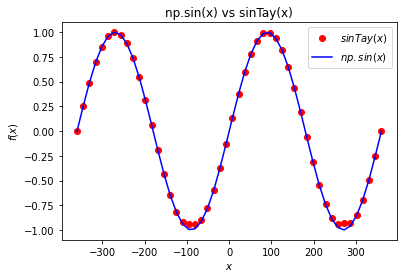

In [ ]:
# Gráfica de la función sinTay(x) vs np.sin(x)
# Cargamos las librerias y paquetes
from matplotlib import pyplot as plt #Graficas 2D
x = np.linspace(-360,360)
y = np.sin(x*np.pi/180)
values = []
for i in x:
  values.append(sinTay(i))
plt.plot(x,values,'or',label='$sinTay(x)$')
plt.plot(x,y,'-b',label='$np.sin(x)$')
ax = plt.gca() # Se obtiene el control para los ejes actuales
ax.set_xlabel("$x$") # Etiqueta eje x
ax.set_ylabel("$f(x)$") # Etiqueta eje y
ax.set_title("np.sin(x) vs sinTay(x)") # Titulo
ax.legend(loc = 'upper right') # Leyenda a partir de las etiquetas
plt.show()

In [ ]:
-390%360

330

## <FONT COLOR="blue">Ejercicio 4</FONT>
Haga funciones en Python que implementen las siguientes operaciones con matrices utilizando solamente ciclos (for ó while) y referencias a los elementos de las matrices. Para representar las matrices en Python puede usar listas, tuplas o arreglos de numpy, sólo que para la última opción no se pueden usar los operadores ya implementados para los ndarray.

<ol type = "a"> 
<li> <i>Suma de matrices.</i> Sean $A, B, C \in M_{mxn}(\mathbb{R})$, la suma de matices $C=A+B$ tiene por entradas $c_{i,j}=a_{i,j}+b_{i,j}$ para $1\leq i\leq m$, $1\leq j\leq n$.
<li> <i>Producto de matrices.</i> Sean $A \in M_{mxn}(\mathbb{R})$, $B \in M_{nxp}(\mathbb{R})$ y $C \in M_{mxp}(\mathbb{R})$, el producto de matrices $C=AB$ tiene por entradas $c_{i,j}=\displaystyle\sum_{k=1}^{n}a_{i,k}b_{k,j}$ para $1\leq i\leq m$, $1\leq j\leq p$.
<li> <i>Traza de una matriz.</i> Sea $A \in M_{nxn}(\mathbb{R})$, la traza se define como $tr(A)=\displaystyle\sum_{i=1}^{n}a_{i,i}$.
<li> <i>Transpuesta de una matriz.</i> Sea $A \in M_{mxn}(\mathbb{R})$, la transpuesta de $A$, la cual se denota como $A^{T} \in M_{nxm}(\mathbb{R})$ tiene por entradas $(A^{T})_{i,j}=a_{j,i}$ para $1\leq i\leq m$, $1\leq j\leq n$.
<li> Utilice las funciones creadas en los incisos anteriores y las matrices
    \begin{equation}
    A =
    \begin{pmatrix}
    17 & -3 & 6 & 13 & 12 \\
    -8 & 5 & 15 & -9 & 10 \\
    -7 & 7 & -20 & 3 & -22 \\
    -22 & 2 & -7 & 7 & 10 \\
    -7 & 1 & 5 & -9 & -2
    \end{pmatrix}
    \end{equation}
    \begin{equation}
    B =
    \begin{pmatrix}
    -9 & 9 & 3 \\
    -10 & 1 & 1 \\
    -23 & -10 & -9 \\
    7 & -5 & -6 \\
    -3 & -8 & -27
    \end{pmatrix}
    \end{equation}
    \begin{equation}
    C =
    \begin{pmatrix}
    -8 & 2 & -2 & 8 & -10 \\
    -1 & 4 & 16 & 8 & 11 \\
    -5 & -16 & 9 & -15 & -18 
    \end{pmatrix}
    \end{equation}
    \begin{equation}
    D =
    \begin{pmatrix}
    13 & 24 & -11 \\
    1 & 1 & -17 \\
    16 & -2 & -10
    \end{pmatrix}
    \end{equation}
para realizar las siguientes operaciones escritas en un script
<ul>
<li> $A+BC$
<li> $C+B^{T}$
<li> $ABC$
<li> $BD+C^{T}$
<li> $(BDC+A)^{T}$
<li> $tr((CB)^{T})+D$
</ul>

</ol>

<u>Solución:</u>

Creación de funciones:

Suma de matrices

In [ ]:
def suma(m1, m2):  # Recibe como parámetros las 2 matrices a sumar
    
    # Verificamos que las 2 matrices tengan la misma dimención (mismo número de filas y columnas)
    if len(m1) == len(m2) and len(m1[0]) == len(m2[0]):
    
        m3 = []  # lista vacía que posteriormente contendrá la suma
        
        # Construimos la dimención de la matriz m3 y la llenamos de puros ceros
        # m3 tentrá la misma dimención que m1 y m2
        for i in range(len(m1)):  # mismo número de filas que m1 y m2 
            m3.append([])  # creamos filas vacías
            for j in range(len(m1[0])):  # mismo número de columnas que m1 y m2
                m3[i].append(0)  # llenamos toda la matriz de ceros por el monento
        
        # Sustituimos la matríz m3 de ceros por la suma
        for i in range(len(m3)):  # recorre las filas de m3
            for j in range(len(m3[0])):  # recorre las columnas de m3
                m3[i][j] = m1[i][j] + m2[i][j]  # $c_{i,j} = a_{i,j} + b_{i,j}$
        
        return m3  # regresamos la suma
                
    else:
        
        return None  # no regresamos nada (print("No se pueden sumar"))

Producto de matrices

In [ ]:
def producto(m1, m2):  # Recibe como parámetros las 2 matrices a multiplicar en ese orden (AB ≠ BA)
    
    # Verificamos que el número de columnas de la matriz m1 sea igual al numero de filas de la matriz m2
    if len(m1[0]) == len(m2):
        
        m3 = []  # lista vacía que posteriormente contendrá el producto
        
        # Construimos la dimención de la matriz m3 y la llenamos de puros ceros
        # m3 tentrá el mismo número de filas que m1 y el mismo número de columnas que m2
        for i in range(len(m1)):  # mismo número de filas que m1
            m3.append([])  # creamos filas vacías
            for j in range(len(m2[0])):  # mismo número de columnas que m2
                m3[i].append(0)  # llenamos toda la matríz de ceros por el momento
        
        # Sustituimos la matriz m3 de ceros por la multiplicación
        for i in range(len(m1)):  # recorre las filas de m1
            for j in range(len(m2[0])):  # recorre las columnas de m2
                for k in range(len(m1[0])):  # recorre las columnas de m1
                    m3[i][j] += m1[i][k]*m2[k][j]  # $c_{i,j} = \sum_{k=1}^{n} a_{i,k}b_{k,j}$
        
        return m3  # regresamos la multiplicación
    
    else:
        
        return None  # no regresamos nada (print("No se pueden sumar"))

Traza de una matriz

In [ ]:
def traza(m):  # Recibe como parámetro una matriz cuadrada
    
    # Verificamos que sea una matriz cuadrada (mismo número de filas que de columnas)
    if len(m) == len(m[0]):
        
        trm = 0  # traza de m (suma de la diagonal de m)
        
        for i in range(len(m)):  # recorre los eleentos de la diagonal
            trm += m[i][i]  # $tr(A) = \sum_{i=1}^{n} a_{i,i}$
        
        return trm  # regresamos la traza de m
    
    else:
        
        return None  # no regresamos nada (print("No se pueden sumar"))

Transpuesta de una matriz

In [ ]:
def transpuesta(m):  # Recibe como parámetro una matriz
    
    mT = []  # lista vacía que posteriormente contendrá la transpuesta de m
    
    # Construimos la dimención de la matriz mT y la llenamos de puros ceros
    # el número de filas de mT será el número de columnas de m y el número de columnas de mT será el número de filas de m
    for i in range(len(m[0])):  # filas de mT = columnas de m
        mT.append([])  # creamos filas vacías
        for j in range(len(m)):  # columnas de mT = filas de m
            mT[i].append(0)  # llenamos toda la matriz de ceros por el monento
        
        # Sustituimos la matríz mT de ceros por la transpuesta de m
        for i in range(len(mT)):  # recorre las filas de mT
            for j in range(len(mT[0])):  # recorre las columnas de mT
                mT[i][j] = m[j][i]  # $(A^{T})_{i,j} = a_{j,i}$
    
    return mT  # regrasamos la transpueta de m

Mostrar matriz

In [ ]:
# imprime una matriz con formato
def mostrar(matriz):   # Recibe como parámetro una matriz
    for fila in matriz:
        for elemento in fila:
            print(" ", elemento, end = " ")
        print()

Definción de las matrices a operar:

In [ ]:
# Definimos las matrices que nos dan como listas de listas
A = [[17,-3,6,13,12],[-8,5,15,-9,10],[-7,7,-20,3,-22],[-22,2,-7,7,10],[-7,1,5,-9,-2]]
B = [[-9,9,3],[-10,1,1],[-23,-10,-9],[7,-5,-6],[-3,-8,-27]]
C = [[-8,2,-2,8,-10],[-1,4,16,8,11],[-5,-16,9,-15,-18]]
D = [[13,24,-11],[1,1,-17],[16,-2,-10]]

# Mostramos La matrices
print("Matriz A")
mostrar(A)
print()
print("Matriz B")
mostrar(B)
print()
print("Matriz C")
mostrar(C)
print()
print("Matriz D")
mostrar(D)

Matriz A
  17   -3   6   13   12 
  -8   5   15   -9   10 
  -7   7   -20   3   -22 
  -22   2   -7   7   10 
  -7   1   5   -9   -2 

Matriz B
  -9   9   3 
  -10   1   1 
  -23   -10   -9 
  7   -5   -6 
  -3   -8   -27 

Matriz C
  -8   2   -2   8   -10 
  -1   4   16   8   11 
  -5   -16   9   -15   -18 

Matriz D
  13   24   -11 
  1   1   -17 
  16   -2   -10 


Operación de las matrices:

$A+BC$

In [ ]:
op1 = suma(A, producto(B, C))  # Nota: BC ≠ CB
mostrar(op1)

  65   -33   195   -32   147 
  66   -27   60   -96   103 
  232   65   -215   -126   260 
  -43   92   -155   113   -7 
  160   395   -360   308   426 


$C+B^{T}$

In [ ]:
op2 = suma(C, transpuesta(B))
mostrar(op2)

  -17   -8   -25   15   -13 
  8   5   6   3   3 
  -2   -15   0   -21   -45 


$ABC$

In [ ]:
op3 = producto(A, producto(B, C))  # Nota: A(BC) = (AB)C
mostrar(op3)

  3759   5832   -4396   3904   8623 
  5430   4080   -6530   206   8048 
  -8335   -9572   10478   -4370   -15401 
  -1058   4760   -7389   5631   -597 
  788   -1130   -191   -2005   -145 


$BD+C^{T}$

In [ ]:
op4 = suma(producto(B, D), transpuesta(C))  # Nota: BD ≠ DB
mostrar(op4)

  -68   -214   -89 
  -111   -237   67 
  -455   -528   522 
  -2   183   53 
  -489   -15   421 


$(BDC+A)^{T}$

In [ ]:
op5 = transpuesta(suma(producto(B, producto(D, C)), A))  # Nota: B(CD) = (BC)D
mostrar(op5)

  1130   722   1596   -457   1656 
  369   -2513   -11283   -406   -8085 
  -4038   -2868   -3201   3425   4498 
  -911   -4086   -15668   307   -10634 
  -219   -3005   -10710   811   -3400 


$tr((CB)^{T}+D)$

In [ ]:
op6 = traza(suma(transpuesta(producto(C, B)), D))  # Nota: CB ≠ BC
print(op6)

359


## <FONT COLOR="blue">Ejercicio 5</FONT>
Una transformación $w: \mathbb{R}^2 \to \mathbb{R}^2$ de la forma:

\begin{align}
        w(\bar{x}) = \begin{pmatrix}
        ax + by +c \\
        cx + dy + e 
        \end{pmatrix}
    \end{align}

donde $a, b, c, d, e$ y $f$ son números reales, y $\bar{x}=(x, y)^T \in \mathbb{R}^2$ es llamada una transformación afín (de dimensión 2). Esta transformación afín se puede representar de forma matricial, esto es 

$$w(\bar{x}) = A\bar{x} + \bar{b}$$

para 
\begin{align}
        A = \begin{pmatrix}
        a & b \\
        c & d 
        \end{pmatrix}\;\;\;
        \bar{b}= \begin{pmatrix}
        e\\
        f
        \end{pmatrix}.
    \end{align}

El fractal del helecho *(helecho Barnsley)* puede ser implementado al graficar puntos creados iterativamente de acuerdo a la transformación afín 

\begin{align}
        \begin{pmatrix}
        x_{k+1} \\
        y_{k+1} 
        \end{pmatrix}= w_{H}(\bar{x_k})=
        A \begin{pmatrix}
        x_k\\
        y_k
        \end{pmatrix} + \bar{b}
    \end{align}

para $A$ y $\bar{b}$ elegidos en cada iteración $k$ de manera aleatoria con diferente probabilidad de entre una de las siguientes reglas: 

1.  <FONT COLOR="blue">Regla 1</FONT> (con 85% de probabilidad)
\begin{align}
  A = \begin{pmatrix}
      0.85 & 0.04 \\
      -0.04 & 0.85 
      \end{pmatrix}\;\;\;
  \bar{b}= \begin{pmatrix}
            0\\
            1.6
            \end{pmatrix}
\end{align}

2. <FONT COLOR="blue">Regla 2</FONT> (con 7% de probabilidad)
\begin{align}
  A = \begin{pmatrix}
      0.20 & -0.26 \\
      0.23 & 0.22 
      \end{pmatrix}\;\;\;
  \bar{b}= \begin{pmatrix}
            0\\
            1.6
            \end{pmatrix}
\end{align}

3. <FONT COLOR="blue">Regla 3</FONT> (con 7% de probabilidad)
\begin{align}
  A = \begin{pmatrix}
      -0.15 & 0.28 \\
      0.26 & 0.24 
      \end{pmatrix}\;\;\;
  \bar{b}= \begin{pmatrix}
            0\\
            0.44
            \end{pmatrix}
\end{align}

4. <FONT COLOR="blue">Regla 4</FONT> (con 1% de probabilidad)
\begin{align}
  A = \begin{pmatrix}
      0 & 0 \\
      0 & 0.16 
      \end{pmatrix}\;\;\;
  \bar{b}= \begin{pmatrix}
            0\\
            0
            \end{pmatrix}
\end{align}

<FONT COLOR="blue">a)</FONT> Escriba una función que regrese dos vectores $x$ y $y$ cuyas entradas $k$ ($k = 0$ hasta $n-1$) correspondan a los $n$ puntos generados iterativamente por la transformación $w_H$. Tome como punto inicial $x[0]=x_0 = 0.5$ y $y[0]=y_0=0.5$.

In [ ]:
import random 
import numpy as np

random.seed(10)
def helecho_barnsley(n, p1 = 0.85, p2 = 0.07, p3 = 0.07):
    '''
    Esta función regresa una matriz con dos renglones y n columnas.
    El primer renglón es el vector x, el segundo renglón es el vector
    y, que reproducen la figura del helecho de Barnsley, por medio de 
    una transformación afín: w(x) = A(x) + b
    Parámetros
    n: el número de puntos a graficar.
    p1, p2, p3: las probabilidades para la matriz A y el vector b
    del helecho de Barnsley
    Salida
    Matriz M de 2xn, donde M[0,:] es el vector x y M[1,:] es el vector y
    '''
    x_bar = np.zeros((2, n))
    x_bar[:,0] = 0.5 
    for i in range(1, n):
        rn = random.random()
        if (rn <= p1):
            A = np.array([[0.85, 0.04],[-0.04, 0.85]])
            b = np.array([0, 1.6])
        elif (p1 < rn and rn <= p1 + p2):
            A = np.array([[0.20, -0.26],[0.23, 0.22]])
            b = np.array([0, 1.6])
        elif (p1 + p2 < rn and rn <= p1 + p2 + p3):
            A = np.array([[-0.15, 0.28],[0.26, 0.24]])
            b = np.array([0, 0.44])
        else:
            A = np.array([[0, 0],[0, 0.16]])
            b = np.array([0, 0])
        x_bar[:,i] = A@x_bar[:,i-1] + b
    return x_bar

<FONT COLOR="blue">b)</FONT> Use un script y la función <TT>subplot</TT> para mostrar las gráficas que se obtienen con $n = 50, 500, 5000$ y $50,000$ iteraciones (puntos). Para generar las gráficas, use la función del inciso anterior y grafique $x$ vs $y$ como puntos invdividuales (use <TT>scatter<TT>).

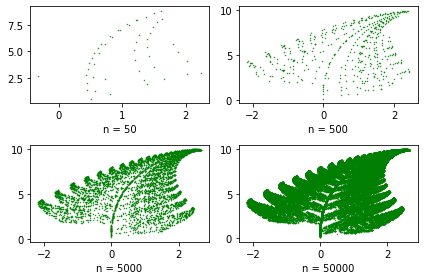

In [ ]:
import matplotlib.pyplot as plt

fig1 = helecho_barnsley(50)
fig2 = helecho_barnsley(500)
fig3 = helecho_barnsley(5000)
fig4 = helecho_barnsley(50000)

fig, axs = plt.subplots(2, 2)
axs[0,0].scatter(fig1[0,:], fig1[1,:], s = 0.2, edgecolor = 'green')
axs[0,0].set_xlabel("n = 50")
axs[0,1].scatter(fig2[0,:], fig2[1,:], s = 0.2, edgecolor = 'green')
axs[0,1].set_xlabel("n = 500")
axs[1,0].scatter(fig3[0,:], fig3[1,:], s = 0.2, edgecolor = 'green')
axs[1,0].set_xlabel("n = 5000")
axs[1,1].scatter(fig4[0,:], fig4[1,:], s = 0.2, edgecolor = 'green')
axs[1,1].set_xlabel("n = 50000")

fig.tight_layout()

plt.show() 

## <FONT COLOR="blue">Ejercicio 6</FONT>
Realice un programa que permita calcular la edad de una persona (al dia de hoy) a partir de su fecha de nacimiento. Para ello, pida la fecha de nacimiento del usuario $(dd-mm-aaaa)$ y haga una o varias funciones que permitan calcular la edad en anios, meses y dias. Por ejemplo, si la fecha de nacimiento es:  $22-4-2000$, la respuesta del programa debe ser $21$ años, $6$ meses
y $7$ días considerando que la fecha de hoy es la fecha de entrega 
$(29-10-2021)$.

El programa debe comprobar que la fecha de nacimiento sea válida (es decir, que exista en el calendario), que no sea una fecha mayor que la fecha del dia de hoy y en dado caso que no se cumplan estas condiciones mandar los mensajes correspondientes. Puede usar el modulo datetime para recuperar la fecha de hoy de su sistema mediante el siguiente codigo:



```
from datetime import date 
hoy = date.today()
print(hoy.day, hoy.month, hoy.year)
```



<FONT COLOR="blue">Nota: </FONT> No puede usar ninguna otra función o estructura del módulo datetime aparte de las líneas previas.

 Importamos lo permitido del módulo date time y definimos la tupla month, donde la i-ésima entrada representa el i-esimo mes del año, y el valor asignado a esta es el numero de días que tiene el mes, por practicidad se dejan de lado los años bisiestos (Ojo: Esto no afecta el resultado deseado)

In [ ]:
from datetime import date
hoy = date.today()
month = (31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31)


Definimos la funcion que verifica que nuestra fecha sea valida, esta función regresa una tupla con dos elementos.
Lo primero que hace la funcion es separar el parametro recibido y almacenarlo en una lista (bd), y después verifica 4 cosas: 

1. Que cada elemento de bd sea del tipo integer
2. Que cada entrada de bd este en los rangos de días, meses y años validos, respectivamente
3. Que los días especificados no sean mayores a los días con los que el mes introducido cuenta
4. Se comprueba que la fecha introducida por el usuario no se mayor a la fecha actual, en el caso de que el año de nacimiento sea el actual 

Parámetros

birth_date: Input del usuario, no tiene un 'tipo' definido 

Salida

Tupla de dos elementos, el primer elemento es un boolean y el segundo es una lista de tres elementos

In [ ]:
# Función que verifica que nuestra fecha sea correcta 
def debA(birth_date): 
    try:
        # Tomamos el input del usuario y lo separamos por cada '-', como 
        # maximo se pueden hacer dos divisiones
        bd = birth_date.split(sep="-", maxsplit=2) # Crea una lista
        # Verificación 1
        for i in range(len(bd)):
            bd[i] = int(bd[i])
        # Verificación 2
        if(bd[0] not in range(1, 32) or bd[1] not in range(1, 13) or
                bd[2] not in range(1, (hoy.year + 1))):
            raise
        # Verificación 3
        elif(month[bd[1]-1] < bd[0]): 
            raise
        # Verificación 4
        elif(bd[2] == hoy.year):
            if(bd[1] == hoy.month and bd[0] >= hoy.day):
                raise
            elif(bd[1] > hoy.month):
                raise
        # Si pasa todas las verificaciones
        else:
            return (True, bd)
    except:
        return (False,bd)


Definimos la funcion que calcula nuestra edad. 
Lo primero que hace la funcion es apoyarse en la función que definimos arriba para saber si la fecha introducida es valida. Después, toma la lista que devuelve la funcion debA y pone los elmentos en cantidades 'correctas' para poder encontrar la diferencia con la fecha actual, esto lo hace mediante dos acciones:


1. Si el dia de nacimiento es mas grande que el dia actual, entonces no se cuenta ese mes y se suma a la varible de los díasla cantidad de días correspondiente al mes que se esta 'quitando', para poder hacer la resta y encontrar la diferencia correcta
2. Si el mes de nacimiento es mas grande que el mes actual, entonces no se cuenta ese año y se suma 12 (los meses en un año) a la varaible de los meses para poder hacer la resta y encontrar la diferencia correcta 

Parámetros

birth_date: Input del usuario, no tiene un 'tipo' definido 

Salida

En caso de que el input por el usuario sea el adecuado 'imprime' el calculo de la edad, en caso contrario 'imprime' el mensaje 'Fecha invalida'

Dependecias

Esta funcion se apoya de la tupla que regresa la rutina debA(), 

In [ ]:
# Definimos la funcion que realizara el calculo de la fecha de la persona 
def findA(birth_date):
    verif = debA(birth_date)
    # En caso de que el input sea valido
    if(verif[0]):
        hoy_d= hoy.day
        hoy_m = hoy.month
        hoy_y = hoy.year
        # Caso 1:
        if (verif[1][0] > hoy_d):
            hoy_m = hoy_m - 1
            hoy_d = hoy_d + month[verif[1][1]-1]
        # Caso 2
        if (verif[1][1] > hoy_m):
            hoy_y = hoy_y - 1
            hoy_m = hoy_m + 12

        # Calculamos los dias, los meses y los anios
        cant_d = hoy_d - verif[1][0]
        cant_m = hoy_m - verif[1][1]
        cant_y = hoy_y - verif[1][2]

        # print present age
        print("Tu edad actual es:", cant_y, "anios", cant_m, "meses", 
              cant_d, "dias")
    # Si el input no es valido
    else:
        print("Fecha Invalida")


Una vez definidas las funciones, podemos calcular la edad de la persona

In [ ]:

a = findA(input("Calcula tu edad. \nIntroduce tu fecha de nacimiento (dd-mm-aaaa): "))


Calcula tu edad. 
Introduce tu fecha de nacimiento (dd-mm-aaaa): 31-08-2001
Tu edad actual es: 20 anios 1 meses 29 dias


In [ ]:
-570%360

150